<a href="https://colab.research.google.com/github/Charlie021/Optimizacion/blob/main/Secante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy

In [ ]:
def GraficarFuncionObjetivo():
    a, b = -5, 5
    
    T = np.linspace(a, b, 100)
    U = (T*T+T)*np.cos(2*T)+T*T

    plt.figure(figsize=(6, 3))
    plt.plot(T, U, 'b')
    plt.plot(-0.2069104783, -0.1074352035, 'ko')
    plt.annotate(r'$-0.2069104783, -0.1074352035', (-0.2069104783, -0.1074352035), (0, -0.1074352035))

    plt.xlabel("Temperatura")
    plt.ylabel("Costo")
    plt.grid()
    plt.show()
    
    return None

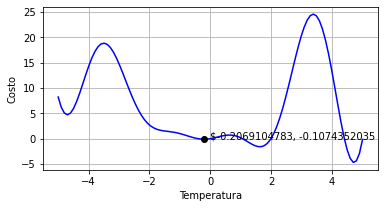

In [ ]:
GraficarFuncionObjetivo()

In [ ]:
def CalcularGradiente():
    T = sympy.Symbol('T')
    fU = (T*T+T)*sympy.cos(2*T)+T*T

    d1fU = sympy.diff(fU)

    print(fU)
    print(d1fU)

    return None

In [ ]:
CalcularGradiente()

T**2 + (T**2 + T)*cos(2*T)
2*T + (2*T + 1)*cos(2*T) - 2*(T**2 + T)*sin(2*T)


In [ ]:
# Funcion objetivo
def U(T):
    return T**2 + (T**2 + T)*np.cos(2*T)

In [ ]:
# Primera derivada
def d1U(T):
    return 2*T + (2*T + 1)*np.cos(2*T) - 2*(T**2 + T)*np.sin(2*T)

In [ ]:
def Secante():
    a, b = -5,5
    epsilon = 0.01
    
    cont = 0
    registro = []
    
    while True:
        # calcular f'(a)
        dU_a = d1U(a)
        
        # calcular f'(b
        dU_b= d1U(b)
        
        # calcular alpha
        alpha = b - dU_b / ((dU_b - dU_a)/(b - a))
        
        dU_alpha = d1U(alpha)
        
        if dU_alpha > 0:
            b = alpha
        else:
            a = alpha
            
        U_alpha = U(alpha)
        
        cont = cont + 1
        
        registro.append([cont, alpha, U_alpha])
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha, U_alpha))
        
        if np.abs(dU_alpha) <= epsilon:
            print("------------------------------------------------------------------------")
            print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha, U_alpha))
            break
            
    return registro

In [ ]:
reg = Secante()

It: 01 - Temp: -0.7985222561 - Costo: 0.6418602338
It: 02 - Temp: -0.4860507346 - Costo: 0.0954637731
It: 03 - Temp: -0.2700992836 - Costo: -0.0961197915
It: 04 - Temp: -0.2156725615 - Costo: -0.1071490975
It: 05 - Temp: -0.2069104783 - Costo: -0.1074352035
------------------------------------------------------------------------
It: 05 - Temp: -0.2069104783 - Costo: -0.1074352035


In [ ]:
def Evaluacion(reg):
    reg1 = np.array(reg)
    fig, axs = plt.subplots(1,2, figsize=(15, 4))

    fig.suptitle('Convergencia')

    axs[0].axhline(55.08, color='k' , linewidth=3, linestyle='--')
    axs[0].plot(reg1[:, 0], reg1[:,1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(1225.17, color='k' , linewidth=3, linestyle='--')
    axs[1].plot(reg1[:, 0], reg1[:,2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()
    
    return None

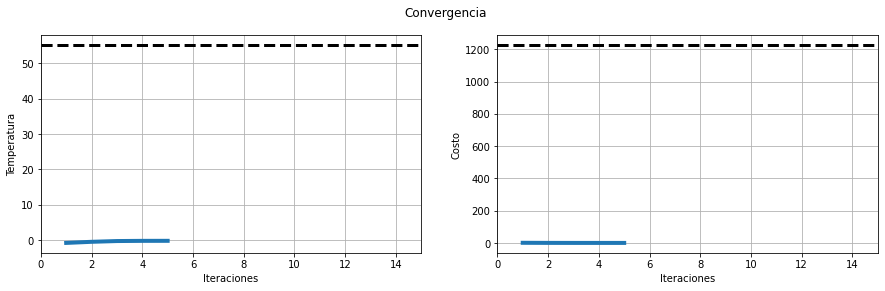

In [ ]:
Evaluacion(reg)